# 📂 Lección 5: Manejo de Archivos y Lectura de Datos en Python


## ¿Por qué es importante?

En análisis de datos, rara vez escribes los datos manualmente.  
Usualmente, **los datos vienen en archivos** que necesitas **leer, procesar y transformar**.


## 🟢 1. Leer archivos `.txt`

### 📘 Lectura línea por línea:

```python
with open("archivo.txt", "r") as archivo:
    for linea in archivo:
        print(linea.strip())
# r significa modo de lectura
#with gestiona el arhcico. lo cierra automaticmanet
#.strip() elimina de la linea \n

In [ ]:
#ller archivo  .csv manualmnete 
with open("datos.csv", "r") as archivo:
    for linea in archivo:
        columnas = linea.strip().split(",")
        print(columnas)
#.split(",") es quien debide cada linea usando la coma como separador

In [ ]:
#guardar el dataframe como archivo .csv
df.to_csv("nuevo_archivo.csv", index=False)

---

# 🐼 Lección 6: Introducción a `pandas` para Análisis de Datos


## 📌 ¿Qué es `pandas`?

`pandas` es una librería de Python que permite:
- Leer archivos (`.csv`, `.xlsx`, etc.)
- Manipular, filtrar y transformar datos
- Trabajar con tablas (`DataFrames`) y columnas (`Series`)
- Analizar datos de forma sencilla y poderosa

## 🛠️ Instalación (si lo necesitas)

```bash
pip install pandas


In [ ]:
df.head()         # Primeras 5 filas
df.tail()         # Últimas 5 filas
df.info()         # Información general
df.shape          # Filas y columnas
df.columns        # Nombres de columnas
df.describe()     # Estadísticas resumen (solo numéricas)
df.dtypes.        #tipo de datos

In [ ]:
#para filtrar datos
# Personas mayores de 18
df[df["edad"] > 18]

# Filtrar por texto
df[df["ciudad"] == "Bogota"]


In [ ]:
#ejmelo: crear un Dataframe desde un dccionario
data = {
    "nombre": ["Ana", "Luis", "Camilo"],
    "edad": [20, 22, 21],
    "ciudad": ["Neiva", "Bogotá", "Neiva"]
}

df = pd.DataFrame(data)
print(df)


In [ ]:
#leer un .csv y .xlsx

df = pd.read_csv("anombre del archivo.csv")

df = pd.read_excel("nombre del archivo.xlsx)

In [ ]:
# FILTRA DAT0S

df["edad"]               # Una columna
df[["nombre", "edad"]]   # Varias columnas

#Filtrar filas
df[df["edad"] > 21]
df[df["ciudad"] == "Neiva"]

#filtatr conn condiciones
df[(df["edad"] > 21) & (df["ciudad"] == "Neiva")]
df[(df["carrera"] == "Matemáticas") | (df["carrera"] == "Ingeniería")]
# & para AND y | para OR


#filtar para filas cpon indice
#.iloc[] parea posicion numerica
#.loc[] por indice o nombre
df.iloc[0]           # Primera fila
df.iloc[0:3]         # Primeras 3 filas
df.loc[2]            # Fila con índice 2

#agregar, modificar y eliminar columnas
df["mayor_edad"] = df["edad"] >= 18

df["nombre_completo"] = df["nombre"] + " Pérez"

del df["nombre_completo"]  # Eliminar una columna


In [ ]:
#ANALIZAR DATOS 

df.groupby("ciudad")["edad"].mean()  # Edad promedio por ciudad
df.groupby("carrera").size()         # Conteo por carrera

df["carrera"].value_counts().    #Contar valores unicos




f.isnull().sum()       # Cuántos nulos hay por columna
df.isna().mean() * 100  # Porcentaje de nulos por columna

df.dropna()                   # Elimina filas con nulos
df.fillna(0)                  # Rellena con 0
df["columna"].fillna("Desconocido", inplace=True)


In [ ]:
#TRANSFORMAR DATOS

#cambiar nombres de las columnas 
df.rename(columns={"Nombre": "nombre"}, inplace=True)
df.columns = df.columns.str.lower().str.replace(" ", "_")


#reemplazar valores 
df["genero"].replace({"M": "Masculino", "F": "Femenino"}, inplace=True)


In [ ]:
#ESTADISTICAS DESCRITIVAS POR GRUPO

df.groupby("ciudad")["edad"].mean()             # Edad promedio por ciudad
df.groupby(["ciudad", "carrera"]).size()        # Conteo doble
df.groupby("carrera")["edad"].agg(["mean", "std", "min", "max"])


In [ ]:
#FUNCIONES PERSONALIZADAS

#con apply() 

def clasificar_edad(e):
    if e < 18:
        return "menor"
    elif <60:
        return "adulto"
    else:
        return "mayor"

df["grupo_edad"] = df["edad"].apply(clasificar_edad)


In [ ]:
#ANALISIIS DE CORRELACIONES

#usar .corr() para varible numerica
df.corr(numeric_only=True)   # Matriz de correlación

#filtro para correlaciones altas
cor = df.corr(numeric_only=True)
cor[abs(cor) > 0.8]          # Solo las correlaciones fuertes

#pivot tables
pd.pivot_table(df, values="edad", index="ciudad", columns="carrera", aggfunc="mean")

#valores atipicos 
q1 = df["edad"].quantile(0.25)
q3 = df["edad"].quantile(0.75)
iqr = q3 - q1

limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

outliers = df[(df["edad"] < limite_inferior) | (df["edad"] > limite_superior)]


---

# 🧪 Proyecto guiado: Análisis profundo de datos con `pandas`


## 📁 Dataset sugerido: `estudiantes.csv`

Imagina que tienes un archivo CSV con esta estructura:

| nombre   | edad | ciudad  | carrera                   | nota_final |
|----------|------|---------|---------------------------|------------|
| Ana      | 20   | Neiva   | Matemáticas               | 4.3        |
| Luis     | 22   | Bogotá  | Ingeniería                | 3.8        |
| Camila   | 19   | Neiva   | Matemáticas               | 4.7        |
| Juan     | NaN  | Cali    | Administración            | 3.2        |
| Laura    | 23   | Bogotá  | Ingeniería                | 2.9        |
| Pedro    | 22   | Neiva   | Ciencias de datos         | NaN        |



## 🧩 Paso 1: Cargar y explorar el dataset

```python
import pandas as pd

df = pd.read_csv("estudiantes.csv")
df.head()
df.info()


In [5]:
import pandas as pd

In [7]:
df = pd.read_csv("estudiantes.csv")

In [8]:
df.head()

,nombre,edad,ciudad,carrera,nota_final
0,Ana,20.0,Neiva,Matemáticas,4.3
1,Luis,22.0,Bogotá,Ingeniería,3.8
2,Camila,19.0,Neiva,Matemáticas,4.7
3,Juan,NaN,Cali,Administración,3.2
4,Laura,23.0,Bogotá,Ingeniería,2.9


In [10]:
df.tail()

,nombre,edad,ciudad,carrera,nota_final
1,Luis,22.0,Bogotá,Ingeniería,3.8
2,Camila,19.0,Neiva,Matemáticas,4.7
3,Juan,NaN,Cali,Administración,3.2
4,Laura,23.0,Bogotá,Ingeniería,2.9
5,Pedro,22.0,Neiva,Ciencias de datos,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   nombre      6 non-null      object 
 1   edad        5 non-null      float64
 2   ciudad      6 non-null      object 
 3   carrera     6 non-null      object 
 4   nota_final  5 non-null      float64
dtypes: float64(2), object(3)
memory usage: 372.0+ bytes


In [13]:
df.describe()

,edad,nota_final
count,5.000000,5.000000
mean,21.200000,3.780000
std,1.643168,0.746324
min,19.000000,2.900000
25%,20.000000,3.200000
50%,22.000000,3.800000
75%,22.000000,4.300000
max,23.000000,4.700000


In [ ]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.head(6)
#renombrar lac columnas a formato limpio

,nombre,edad,ciudad,carrera,nota_final
0,Ana,20.0,Neiva,Matemáticas,4.3
1,Luis,22.0,Bogotá,Ingeniería,3.8
2,Camila,19.0,Neiva,Matemáticas,4.7
3,Juan,NaN,Cali,Administración,3.2
4,Laura,23.0,Bogotá,Ingeniería,2.9
5,Pedro,22.0,Neiva,Ciencias de datos,NaN


In [17]:
# Verificar valores nulos
df.isnull().sum()


nombre        0
edad          1
ciudad        0
carrera       0
nota_final    1
dtype: int64

In [21]:
# Eliminar filas con nota faltante
df = df.dropna(subset=["nota_final"])
df.head(6)

,nombre,edad,ciudad,carrera,nota_final
0,Ana,20.0,Neiva,Matemáticas,4.3
1,Luis,22.0,Bogotá,Ingeniería,3.8
2,Camila,19.0,Neiva,Matemáticas,4.7
3,Juan,NaN,Cali,Administración,3.2
4,Laura,23.0,Bogotá,Ingeniería,2.9


In [23]:
# Rellenar edad faltante con la media
df["edad"] = df["edad"].fillna(df["edad"].mean())
df.head(5)


,nombre,edad,ciudad,carrera,nota_final
0,Ana,20.0,Neiva,Matemáticas,4.3
1,Luis,22.0,Bogotá,Ingeniería,3.8
2,Camila,19.0,Neiva,Matemáticas,4.7
3,Juan,21.0,Cali,Administración,3.2
4,Laura,23.0,Bogotá,Ingeniería,2.9


In [27]:

# Carreras únicas
df["carrera"].unique()


array(['Matemáticas', 'Ingeniería', 'Administración'], dtype=object)

In [28]:
# Conteo por carrera
df["carrera"].value_counts()

carrera
Matemáticas       2
Ingeniería        2
Administración    1
Name: count, dtype: int64

In [34]:
# Nota promedio por ciudad
df.groupby("ciudad")["nota_final"].mean()



ciudad
Bogotá    3.35
Cali      3.20
Neiva     4.50
Name: nota_final, dtype: float64

In [33]:

# Edad promedio por carrera
df.groupby("carrera")["edad"].mean()



carrera
Administración    21.0
Ingeniería        22.5
Matemáticas       19.5
Name: edad, dtype: float64

In [35]:

# Nota máxima por carrera
df.groupby("carrera")["nota_final"].max()


carrera
Administración    3.2
Ingeniería        3.8
Matemáticas       4.7
Name: nota_final, dtype: float64

In [39]:
# Clasificar si aprueba (nota >= 3.0)
df["aprueba"] = df["nota_final"] >= 3.0

# Clasificar edad
def clasificar_edad(edad):
    if edad < 21:
        return "menor"
    elif edad < 25:
        return "joven"
    else:
        return "adulto"

df["grupo_edad"] = df["edad"].apply(clasificar_edad)

In [40]:
df.head()

,nombre,edad,ciudad,carrera,nota_final,aprueba,grupo_edad
0,Ana,20.0,Neiva,Matemáticas,4.3,True,menor
1,Luis,22.0,Bogotá,Ingeniería,3.8,True,joven
2,Camila,19.0,Neiva,Matemáticas,4.7,True,menor
3,Juan,21.0,Cali,Administración,3.2,True,joven
4,Laura,23.0,Bogotá,Ingeniería,2.9,False,joven


In [42]:
q1 = df["nota_final"].quantile(0.25)
q3 = df["nota_final"].quantile(0.75)
iqr = q3 - q1

lim_inf = q1 - 1.5 * iqr
lim_sup = q3 + 1.5 * iqr


In [43]:
outliers = df[(df["nota_final"] < lim_inf) | (df["nota_final"] > lim_sup)]
print(outliers)

Empty DataFrame
Columns: [nombre, edad, ciudad, carrera, nota_final, aprueba, grupo_edad]
Index: []


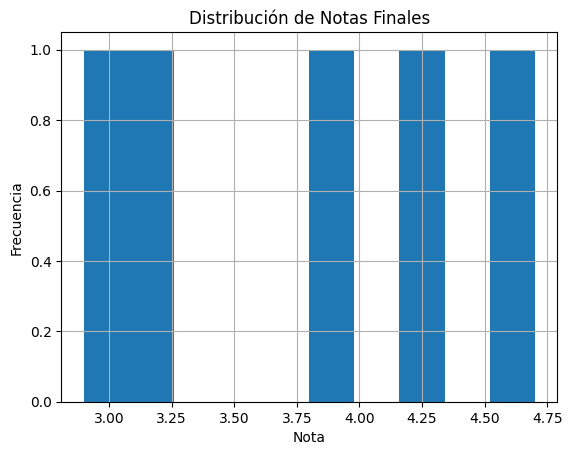

In [44]:
import matplotlib.pyplot as plt

# Histograma de notas
df["nota_final"].hist(bins=10)
plt.title("Distribución de Notas Finales")
plt.xlabel("Nota")
plt.ylabel("Frecuencia")
plt.show()

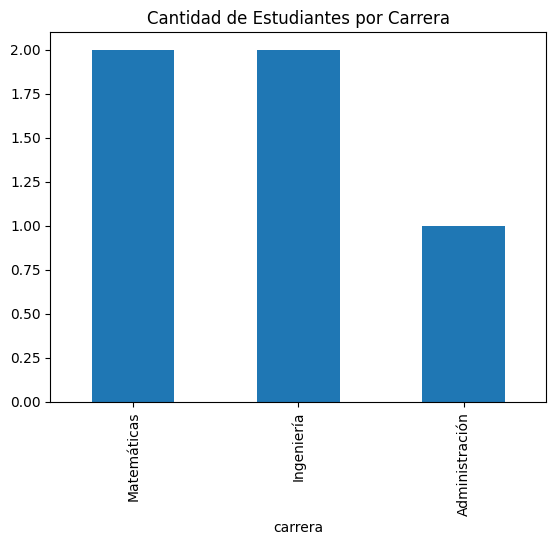

In [45]:
# Barras por carrera
df["carrera"].value_counts().plot(kind="bar")
plt.title("Cantidad de Estudiantes por Carrera")
plt.show()